https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5    

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

https://methods.sagepub.com/base/download/DatasetHowToGuide/latent-dirichlet-allocation-in-news-2016-python

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [4]:
import PyPDF2 as p

text_IFRC = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/IFRC/IFRC_result.pdf")



In [5]:
text_IFRC.lower()

'leaving millions \nbehindworld disasters report\n 2018the international humanitarian sector \n must do more to respond to the needs \n of the world™s most vulnerable people\nthe international federation of red cross and red crescent societies is the \nworld™s largest volunteer˜based humanitarian network. with our ˚˛˝ member \nnational red cross and red crescent societies worldwide, we are in virtually \nevery community reaching ˚˙˝.ˆ million people annually through long˜term \nservices and development programmes, as well as ˚˚˝ million people through \ndisaster response and early recovery programmes. we act before, during and \naˇer disasters and health emergencies to meet the needs and improve the lives \nof vulnerable people. we do so with impartiality as to nationality, race, gender, \nreligious beliefs, class and political opinions. guided by \nstrategy ˜˚˜˚\n œ our \ncollective plan of action to tackle the major humanitarian and development \nchallenges of this decade œ we are co

In [6]:
type(text_IFRC)

str

In [7]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [8]:
type(text_IFRC)

str

In [9]:
Sent = nltk.word_tokenize(text_IFRC)
print(nltk.pos_tag(Sent))

[('Leaving', 'VBG'), ('Millions', 'NNP'), ('BehindWorld', 'NNP'), ('Disasters', 'NNP'), ('Report', 'NNP'), ('2018The', 'CD'), ('international', 'JJ'), ('humanitarian', 'JJ'), ('sector', 'NN'), ('must', 'MD'), ('do', 'VB'), ('more', 'JJR'), ('to', 'TO'), ('respond', 'VB'), ('to', 'TO'), ('the', 'DT'), ('needs', 'NNS'), ('of', 'IN'), ('the', 'DT'), ('world™s', 'NN'), ('most', 'RBS'), ('vulnerable', 'JJ'), ('people', 'NNS'), ('The', 'DT'), ('International', 'NNP'), ('Federation', 'NNP'), ('of', 'IN'), ('Red', 'NNP'), ('Cross', 'NNP'), ('and', 'CC'), ('Red', 'NNP'), ('Crescent', 'NNP'), ('Societies', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('world™s', 'NN'), ('largest', 'JJS'), ('volunteer˜based', 'VBN'), ('humanitarian', 'JJ'), ('network', 'NN'), ('.', '.'), ('With', 'IN'), ('our', 'PRP$'), ('˚˛˝', 'JJ'), ('member', 'NN'), ('National', 'NNP'), ('Red', 'NNP'), ('Cross', 'NNP'), ('and', 'CC'), ('Red', 'NNP'), ('Crescent', 'NNP'), ('Societies', 'NNP'), ('worldwide', 'RB'), (',', ','), ('we', '

In [10]:
sent1 = nltk.pos_tag(Sent)

In [11]:
sent1[:30]

[('Leaving', 'VBG'),
 ('Millions', 'NNP'),
 ('BehindWorld', 'NNP'),
 ('Disasters', 'NNP'),
 ('Report', 'NNP'),
 ('2018The', 'CD'),
 ('international', 'JJ'),
 ('humanitarian', 'JJ'),
 ('sector', 'NN'),
 ('must', 'MD'),
 ('do', 'VB'),
 ('more', 'JJR'),
 ('to', 'TO'),
 ('respond', 'VB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('needs', 'NNS'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('world™s', 'NN'),
 ('most', 'RBS'),
 ('vulnerable', 'JJ'),
 ('people', 'NNS'),
 ('The', 'DT'),
 ('International', 'NNP'),
 ('Federation', 'NNP'),
 ('of', 'IN'),
 ('Red', 'NNP'),
 ('Cross', 'NNP'),
 ('and', 'CC')]

In [12]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [13]:
nouns

['sector',
 'needs',
 'world™s',
 'people',
 'world™s',
 'network',
 'member',
 'community',
 'people',
 'long˜term',
 'services',
 'development',
 'programmes',
 'people',
 'disaster',
 'response',
 'recovery',
 'disasters',
 'health',
 'emergencies',
 'needs',
 'lives',
 'people',
 'impartiality',
 'nationality',
 'race',
 'gender',
 'beliefs',
 'class',
 'opinions',
 'plan',
 'action',
 'development',
 'challenges',
 'decade',
 'Œ',
 'lives',
 'minds',
 'strength',
 'volunteer',
 'network',
 'expertise',
 'independence',
 'neutrality',
 'standards',
 'partners',
 'development',
 'response',
 'disasters',
 'decision',
 '˜makers',
 'times',
 'interests',
 'people',
 'result',
 'communities',
 'vulnerabilities',
 'strengthen',
 'resilience',
 'culture',
 'peace',
 'world',
 'rights',
 'quotation',
 'review',
 'work',
 'part',
 'publication',
 'retrieval',
 'system',
 'form',
 'means',
 'permission',
 'publication',
 'fee',
 'purposes',
 'resale',
 'permission',
 'uses',
 'circumstances

In [14]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['sector', 'needs', 'world™s', 'people', 'world™s', 'network', 'member', 'community', 'people', 'long˜term', 'services', 'development', 'programmes', 'people', 'disaster', 'response', 'recovery', 'disasters', 'health', 'emergencies', 'needs', 'lives', 'people', 'impartiality', 'nationality', 'race', 'gender', 'beliefs', 'class', 'opinions', 'plan', 'action', 'development', 'challenges', 'decade', 'lives', 'minds', 'strength', 'volunteer', 'network', 'expertise', 'independence', 'neutrality', 'standards', 'partners', 'development', 'response', 'disasters', 'decision', '˜makers', 'times', 'interests', 'people', 'result', 'communities', 'vulnerabilities', 'strengthen', 'resilience', 'culture', 'peace', 'world', 'rights', 'quotation', 'review', 'work', 'part', 'publication', 'retrieval', 'system', 'form', 'means', 'permission', 'publication', 'fee', 'purposes', 'resale', 'permission', 'uses', 'circumstances', 'reuse', 'publications', 'translation', 'adaptation', 'permission', 'publisher', 

In [15]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

sector needs world™s people world™s network member community people long˜term services development programmes people disaster response recovery disasters health emergencies needs lives people impartiality nationality race gender beliefs class opinions plan action development challenges decade lives minds strength volunteer network expertise independence neutrality standards partners development response disasters decision ˜makers times interests people result communities vulnerabilities strengthen resilience culture peace world rights quotation review work part publication retrieval system form means permission publication fee purposes resale permission uses circumstances reuse publications translation adaptation permission publisher opinions publication policy views authors organizations designations expression opinion part status territory authorities Contact details +41 E-mail secretariat www.ifrc.org order copies wdr ifrc.org information visit gratitude donors publication sector ne

In [16]:
type(listToStr)

str

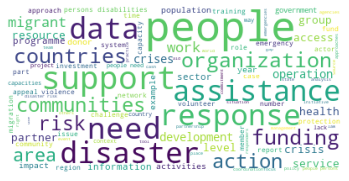

In [17]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(listToStr))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [18]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None,ngram_range=(2,3))
tf = tf_vectorizer.fit_transform(tokens_without_sw)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

18 14  1998 2007  21 14treatment  22 15community  23 14  28 14  \
0          0          0               0               0      0      0   
1          0          0               0               0      0      0   
2          0          0               0               0      0      0   
3          0          0               0               0      0      0   
4          0          0               0               0      0      0   
...      ...        ...             ...             ...    ...    ...   
33132      0          0               0               0      0      0   
33133      0          0               0               0      0      0   
33134      0          0               0               0      0      0   
33135      0          0               0               0      0      0   
33136      0          0               0               0      0      0   

       29 16who  account out  action box  action es  ...  ˆˆ ˆˇˇ ˇˇˇˆˆ  \
0             0            0           0          0  ...             0   
1             0            0           0          0  ...             0   
2             0            0           0          0  ...             0   
3             0            0           0          0  ...             0   
4             0            0           0          0  ...             0   
...         ...          ...         ...        ...  ...           ...   
33132         0            0           0          0  ...             0   
33133         0            0           0          0  ...             0   
33134         0            0           0          0  ...             0   
33135         0            0           0          0  ...             0   
33136         0            0           0          0  ...             0   

       ˆˇˇ ˇˇˇˆˆ  ˆˇˇ ˇˇˇˆˆ ˇˇˇ  ˇˆ 114115out  ˇˆ ˆcold  ˇˆ ˆother  \
0              0              0             0         0          0   
1              0              0             0         0          0   
2              0              0             0         0          0   
3              0              0             0         0          0   
4              0              0             0         0          0   
...          ...            ...           ...       ...        ...   
33132          0              0             0         0          0   
33133          0              0             0         0          0   
33134          0              0             0         0          0   
33135          0              0             0         0          0   
33136          0              0             0         0          0   

       ˇˆ ˆother ˆtransport  ˇˇˇ ˆfig  ˇˇˇˆˆ ˇˇˇ  ˇˇˇˆˆ ˇˇˇ ˆfig  
0                         0         0          0               0  
1                         0         0          0               0  
2                         0         0          0               0  
3                         0         0          0               0  
4                         0         0          0               0  
...                     ...       ...        ...             ...  
33132                     0         0          0               0  
33133                     0         0          0               0  
33134                     0         0          0               0  
33135                     0         0          0               0  
33136                     0         0          0               0  

[33137 rows x 399 columns]

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(tokens_without_sw)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [20]:
df_ngram.head(10)

frequency   bigram/trigram
0         27          con ict
1         26    identi cation
2         16  decision making
3         13          di cult
4         12        de nition
5         11   classi cations
6         11        1998 2007
7         10         su ering
8          9         wild res
9          9         con icts

In [21]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [22]:
df_ngram

frequency   bigram/trigram  polarity  subjective
0           27          con ict       0.0         0.0
1           26    identi cation       0.0         0.0
2           16  decision making       0.0         0.0
3           13          di cult       0.0         0.0
4           12        de nition       0.0         0.0
..         ...              ...       ...         ...
305          1         29 16who       0.0         0.0
306          1            28 14       0.0         0.0
307          1   22 15community       0.0         0.0
308          1   21 14treatment       0.0         0.0
309          1            18 14       0.0         0.0

[310 rows x 4 columns]

In [23]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
of ces de nition 1998 2007 su ering pro le well being two thirds out of in house of money
Topic 1:
identi cation decision making classi cations con icts slow onset long term rapid onset in uence traf cking counter terrorism
Topic 2:
con ict di cult wild res of ce identi ed de nitions di erent bene ts ef ciency di culty


In [24]:
import pyLDAvis.sklearn


In [24]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
2      -632.045471 -384.325073       1        1  36.975305
1     -1209.665405  212.164124       2        1  33.788312
0     -1437.453247 -586.322510       3        1  29.236383, topic_info=     Category       Freq                                                Term  \
511   Default  18.000000                                    commodity export   
1324  Default  15.000000                                  regions subregions   
514   Default  13.000000                                    commodity import   
832   Default  11.000000                                     food insecurity   
1564  Default  12.000000                                          well being   
...       ...        ...                                                 ...   
822    Topic3   1.935362  financial_crisis financialcrisis_report_200902 pdf   
823    Topic3   1.935362                   financialcrisis_report_200902 pdf   
1482   Topic3   1.935362                             topics financial_crisis   
1571   Topic3   4.879588                                             who int   
834    Topic3   2.519286                                       food security   

          Total  loglift  logprob  
511   18.000000  30.0000  30.0000  
1324  15.000000  29.0000  29.0000  
514   13.000000  28.0000  28.0000  
832   11.000000  27.0000  27.0000  
1564  12.000000  26.0000  26.0000  
...         ...      ...      ...  
822    2.349669   1.0358  -5.9778  
823    2.349669   1.0358  -5.9778  
1482   2.349669   1.0358  -5.9778  
1571   8.294962   0.6992  -5.0531  
834    3.562899   0.8832  -5.7141  

[125 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
386       1  0.795468      above average
437       3  0.856053           apps who
438       3  0.856053       apps who int
451       1  0.990133     asylum seekers
464       2  0.985808      below average
...     ...       ...                ...
1604      2  0.986812        www fao org
1631      2  0.939038            www who
1632      2  0.821700        www who int
1635      1  0.924886      www worldbank
1636      1  1.009273  www worldbank org

[99 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])